Programamos ahora las ecuaciones a resolver

In [4]:
from pylab import *
from numpy import *
%matplotlib inline

Reescribimos el método de RUnge-Kutta de 4to orden al que podamos indicarle si se quiere resolver el sistema en cartesianas o polares

In [138]:
def rk4_ar(ec,p_ini,x,args="cartesianas",h=0.01):  #Los argumentos aquí nos dirán si se quiere usar polares o cartesianas
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in range(len(tiempos)-1):
        if args=="cartesianas":
            v2 = (sol[i,:][2]**2+sol[i,:][3]**2)**.5
            if v2<1:
                k1 = ec("cartesianas",sol[i,:],tiempos[i])
                k2 = ec("cartesianas",sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
                k3 = ec("cartesianas",sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
                k4 = ec("cartesianas",sol[i,:]+h*k3,tiempos[i]+h)
                sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
            else:
                k1 = ec("cartesianas",sol[i,:],tiempos[i],1)
                k2 = ec("cartesianas",sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,1)
                k3 = ec("cartesianas",sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,1)
                k4 = ec("cartesianas",sol[i,:]+h*k3,tiempos[i]+h,1)
                sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
        else:
            v2 = (sol[i,:][2]**2+sol[i,:][0]**2*sol[i,:][3]**2)**.5
            if sol[i,:][1]>=2*pi:
                sol[i,:][1] = sol[i,:][1]%(2*pi)
            if v2<1:
                k1 = ec("polares",sol[i,:],tiempos[i])
                k2 = ec("polares",sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
                k3 = ec("polares",sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
                k4 = ec("polares",sol[i,:]+h*k3,tiempos[i]+h)
                sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
            else:
                k1 = ec("polares",sol[i,:],tiempos[i],1)
                k2 = ec("polares",sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,1)
                k3 = ec("polares",sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,1)
                k4 = ec("polares",sol[i,:]+h*k3,tiempos[i]+h,1)
                sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
            
    return tiempos,sol

In [139]:
def oscilador(sistema,r_v,t,v_mayor=0): 
        k = 1
        m = 1
        gamma = .1
        mu = .2
        if sistema == "cartesianas": #EN cartesianas r_v[0] = x, r_v[1] = y, r_v[2] = v_x, r_[v] = v_y
            v2=(r_v[2]**2+r_v[3]**2)**.5
            d_1 = r_v[2]
            d_2 = r_v[3]
            if v_mayor == 0:
                d_v1 = (-k*r_v[0]-gamma*r_v[2])/m
                d_v2 = (-k*r_v[1]-gamma*r_v[3])/m
            else:
                d_v1 = (-k*r_v[0]-mu*v2*r_v[2])/m
                d_v2 = (-k*r_v[1]-mu*v2*r_v[3])/m
        else:
            v2=(r_v[2]**2+r_v[0]**2*r_v[3]**2)**.5#EN polares r_v[0] = r, r_v[1] = theta, r_v[2] = v_r, r_[v] = r omega, donde omega es la derivada temporal de theta
            d_1 = r_v[2]
            d_2 = r_v[3]
            if v_mayor == 0:
                d_v1 = (-k*r_v[0]-gamma*r_v[2])/m +r_v[0]*r_v[3]**2
                d_v2 = ((-gamma*r_v[0]*r_v[3])/m -2*r_v[2]*r_v[3])/r_v[0]
            else:
                d_v1 = (-k*r_v[0]-mu*v2*r_v[2])/m+r_v[0]*r_v[3]**2
                d_v2 =((-mu*v2*r_v[0]*r_v[3])/m-2*r_v[2]*r_v[3])/r_v[0]
        return array([d_1,d_2,d_v1,d_v2])
                
            
                
                
 

Resolvemos ahora para la condición inicial $\vec{r_o} = (0,1)$

(<matplotlib.text.Text at 0x7f3deb0fdcc0>,
 <matplotlib.text.Text at 0x7f3dead79470>)

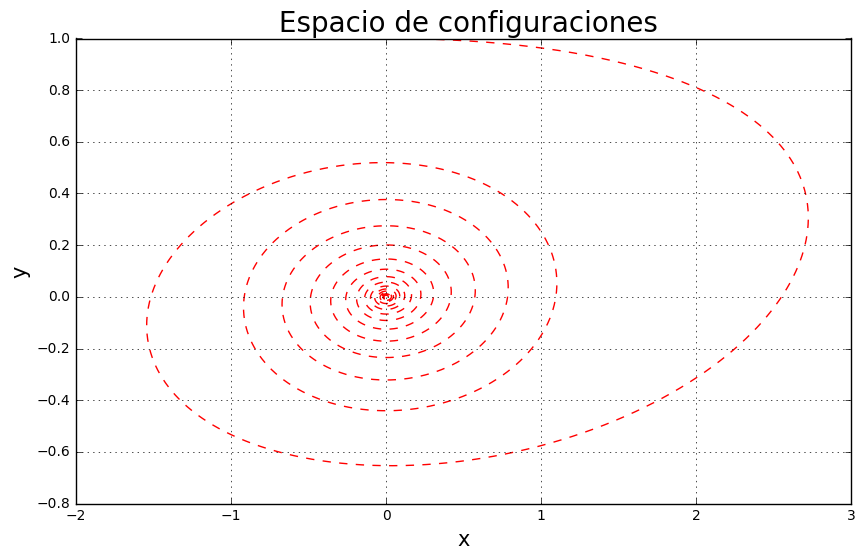

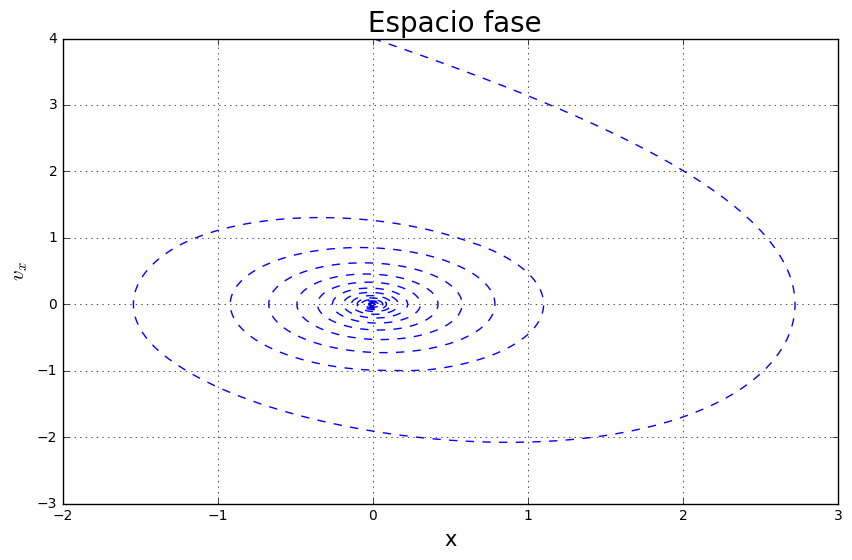

In [109]:
 t,solucion=rk4_ar(oscilador,[0,1,4,0],[0,100],args="cartesianas",h=0.001)
grafica =subplots(figsize=(10, 6))
plot(solucion[:,0],solucion[:,1],ls='--',color = 'r')
grid(True)
title(' Espacio de configuraciones',fontsize = 20)
xlabel('x',fontsize =15), ylabel('y',fontsize =15)
grafica =subplots(figsize=(10, 6))
plot(solucion[:,0],solucion[:,2],'--',color = 'b')
grid(True)
title(' Espacio fase',fontsize = 20)
xlabel('x',fontsize =15), ylabel('$v_x$',fontsize =15)


Resolvemos ahora para condiciones iniciales $\vec{r_o} = (cos \theta,sin \theta)$, con $\theta = \frac{n \pi}{6}$ y $n = 0,1,2,...11$. Notamos que esto equivale a condiciones iniciales $\theta = \frac{n \pi}{6}$ y $r = 1$. Usaremos 2 métodos para obtener el espacio de configuraciones y el espacio fase: en el primero usaremos el método de Runge-Kutta para polares y posteriormente usaremos 

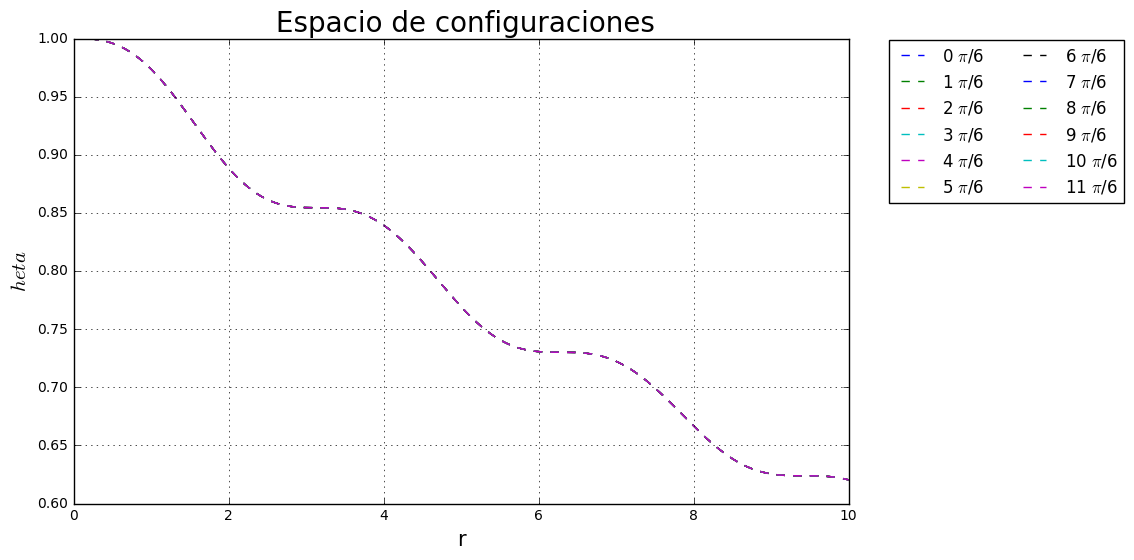

In [142]:
 n = range(12)
grafica =subplots(figsize=(10, 6))
for i in n:
    t,solucion=rk4_ar(oscilador,[1,n[i]*pi/6,0,1],[0,10],args="polares",h=0.01)
    plot(t,solucion[:,0],ls='--',label = "%s $\pi$/6" %n[i])
    grid(True)
    title(' Espacio de configuraciones',fontsize = 20)
    xlabel('r',fontsize =15), ylabel('$\theta$',fontsize =15)
    legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1)
show()
    


In [137]:
solucion[:,1]

array([ 5.75958653,  5.76058643,  5.76158618, ...,  6.43209073,
        6.43209073,  6.43209073])

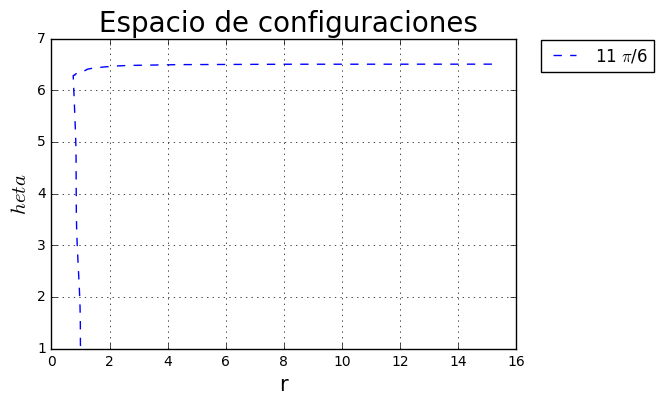

In [105]:
t,solucion=rk4_ar(oscilador,[1,2*pi/6,0,1],[0,10],args="polares",h=0.01)
plot(solucion[:,0],solucion[:,1],ls='--',label = "%s $\pi$/6" %n[i])
grid(True)
title(' Espacio de configuraciones',fontsize = 20)
xlabel('r',fontsize =15), ylabel('$\theta$',fontsize =15)
legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1)
show()


In [131]:
(2*pi+.1)%(2*pi)

0.09999999999999964